In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


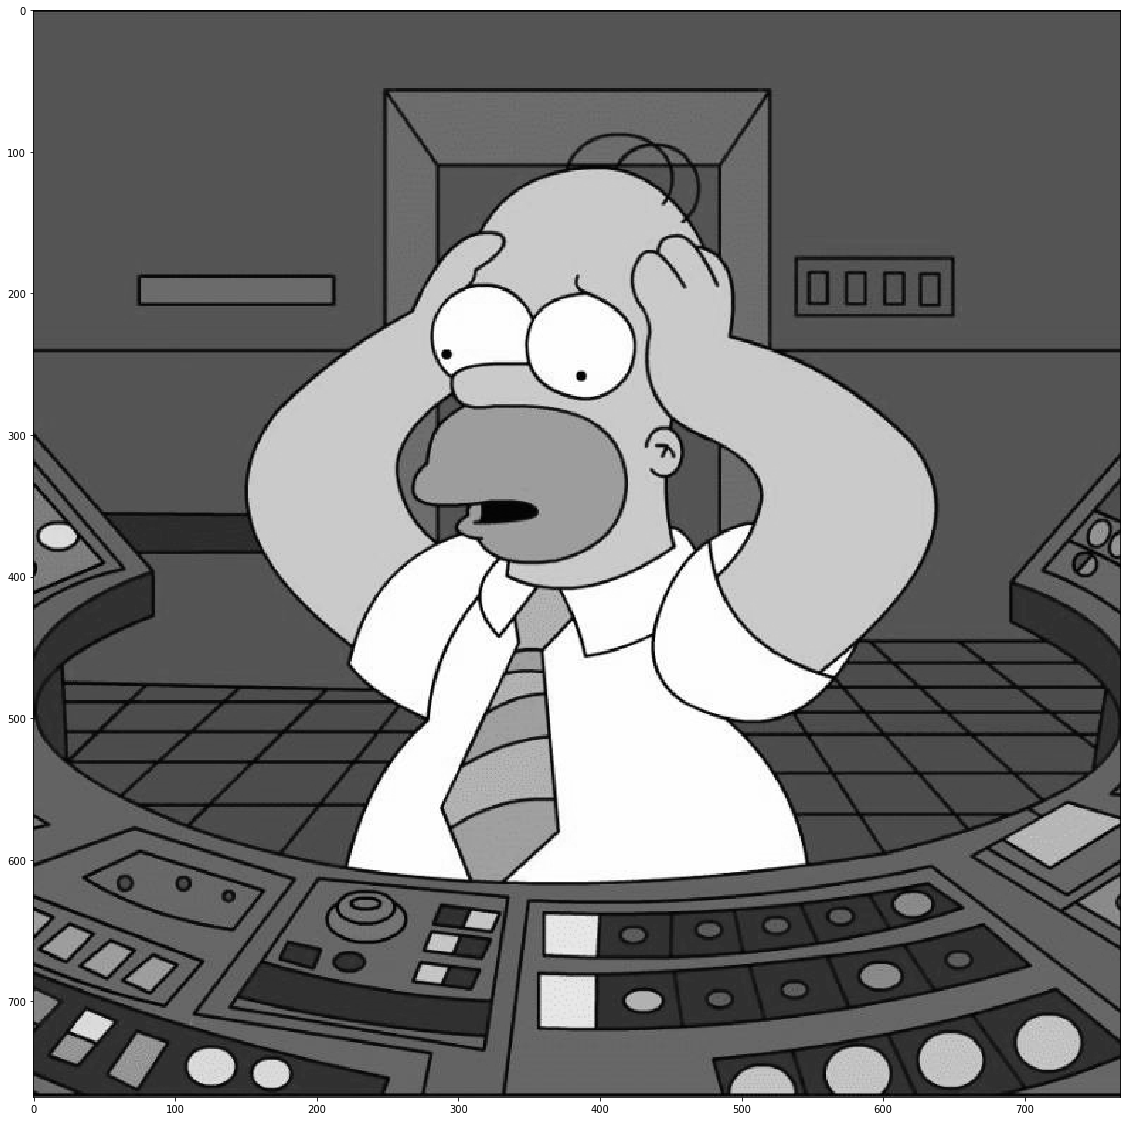

In [11]:
from SLIP import imread
img_orig = imread('homer.jpg')

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img_orig, cmap='gray')

# using torch to build up a pyramid

https://pytorch.org/docs/master/nn.functional.html#upsample


In [19]:
import torch
from torch.nn.functional import upsample
# upsample(input, size=None, scale_factor=None, mode='nearest', align_corners=None)
img_tens = torch.Tensor(img_orig[None, ...])
print('Tensor shape=', img_tens.shape)

Tensor shape= torch.Size([1, 768, 768])


Tensor shape= torch.Size([1, 768, 1536])


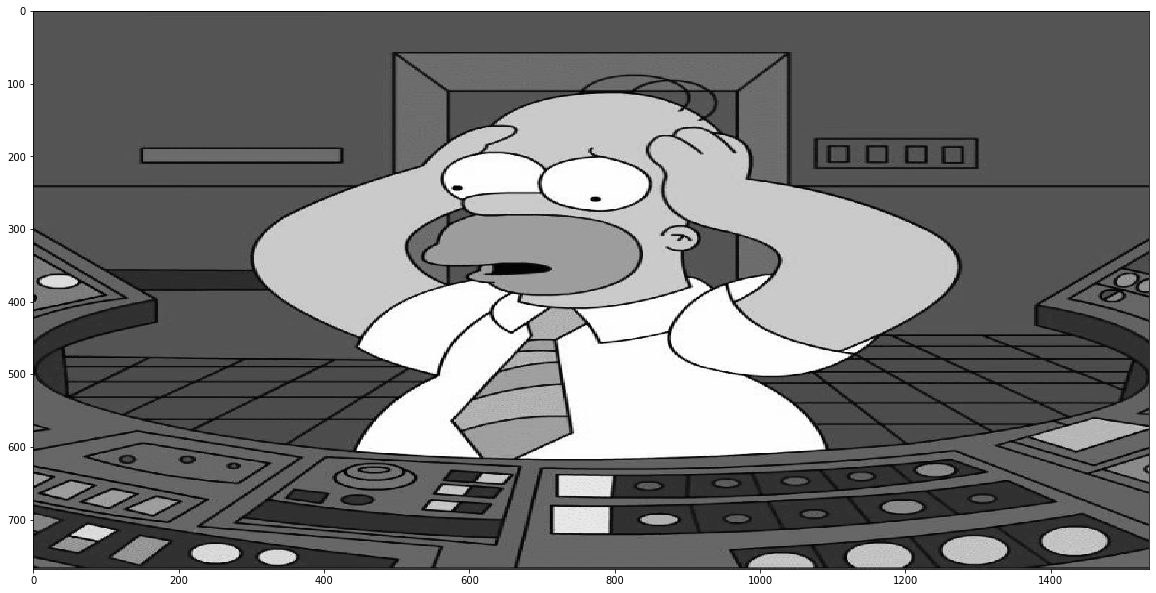

In [23]:
img_up = upsample(img_tens, scale_factor=2, mode='nearest', align_corners=None)
print('Tensor shape=', img_up.shape)
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img_up.numpy()[0, ...], cmap='gray');

In [ ]:
for mode in ['linear', 'bilinear', 'bicubic', 'trilinear']: